## 上机作业

请自行选择语料，构建一个词云，并进行简要的结果分析。

## 程序功能
### 依赖requests库和网易云音乐的多个API，实现：

1.用户输入关键词，程序获取与关键词相关的歌单（如：治愈，摇滚，民谣，清新），提取其中所有歌曲的歌词，并进行语料分析，生成该关键词相关的歌词词云。

2.用户直接输入歌手名称，获取该歌手演唱的曲目中最热门的50首，提取歌词，并进行语料分析，生成该歌手相关的歌词词云。

## 程序编写思路

### 首先，编写爬取网易云音乐歌词的NetEase模块。

借助网上查询的网易云音乐API，利用requests库，利用requests.post和requests.get两个基本函数读取网络内容。另外，需要手动设定请求头。

如果采用根据API读取json格式内容的方式，就利用json.loads()方法，能很简单的读取到需要的内容。

如果采用根据url读取网页html源代码内容的方式，则利用正则表达式匹配所有所需内容。

利用网易云音乐搜索API，网易云音乐歌词API，以及读取歌单网页源代码的方式，实现搜索关键词，读取歌单全部歌曲，以及获取歌曲的歌词等功能。

另外，读取到歌词内容后，要删除其中的歌曲元数据，如作词者，作曲者，出品方等。

### 然后编写主程序。

分为两个模式：

1.搜索关键词相关的歌单，分析歌单中的所有歌曲

模式1：搜索输入的关键词，搜索类型设为"playlist"，获取搜索结果中的全部歌单，读取需要分析的歌单中所有歌曲ID，根据歌曲ID读取歌词，合并为一个字符串进行分析。

2.搜索歌手，分析该歌手演唱的热门歌曲(前50首)

模式2：搜索输入的关键词，搜索类型设为"artist"，让用户选定需要分析的歌手，读取该歌手"热门50首"的所有歌曲ID，根据歌曲ID读取歌词，合并为一个字符串进行分析。

读取到歌词后，就是利用jieba库进行词频分析。这里直接选用了jieba.analyse.textrank()函数筛选出需要的词性。

（词性筛选后依然需要去停用词，保证词云中的词语都是有实际意义的词。）

没有使用先jieba分词，再Counter统计词频的方法。因为这种方法依然需要进行词性分析，否则生成的词云会包含较多口语化或无意义词语。

词频分析完成后，根据用户指定的背景图生成词云图片。

这里将图片较短的一边固定放大到1200像素，保证图片的大小足够，尽量避免文字显示模糊的情况。

`scale=1200 / (Mask.shape[1] if Mask.shape[1] < Mask.shape[0] else Mask.shape[0])`

以上是一切正常的理想状况，还会出现很多异常，如用户输入不符合规范，获取到的歌曲为没有歌词的纯音乐，无法读取图片内容...等情况，也都一一进行了解决，避免在程序运行的过程中出现异常而直接崩溃退出。

# 以下是程序的所有源代码

### 为避免提交多个文件，省略代码中从文件中读取stopwords.txt的步骤，直接手动定义停用词表。

In [1]:
# 运行主程序前要先运行这个，定义停用词表
stopwords = [' ', '?', '、', '。', '“', '”', '《', '》', '！', '，', '：', '；', '？', '同志们', '同时', '啊', '阿', '哎', '哎呀', '哎哟', '唉', '俺', '俺们', '按', '按照', '吧', '吧哒', '把', '罢了', '被', '本', '本着', '比', '比方', '比如', '鄙人', '彼', '彼此', '边', '别', '别的', '别说', '并', '并且', '不比', '不成', '不单', '不但', '不独', '不管', '不光', '不过', '不仅', '不拘', '不论', '不怕', '不然', '不如', '不特', '不惟', '不问', '不只', '朝', '朝着', '趁', '趁着', '乘', '冲', '除', '除此之外', '除非', '除了', '此', '此间', '此外', '从', '从而', '打', '待', '但', '但是', '当', '当着', '到', '得', '的', '的话', '等', '等等', '地', '第', '叮咚', '对', '对于', '多', '多少', '而', '而况', '而且', '而是', '而外', '而言', '而已', '尔后', '反过来', '反过来说', '反之', '非但', '非徒', '否则', '嘎', '嘎登', '该', '赶', '个', '各', '各个', '各位', '各种', '各自', '给', '根据', '跟', '故', '故此', '固然', '关于', '管', '归', '果然', '果真', '过', '哈', '哈哈', '呵', '和', '何', '何处', '何况', '何时', '嘿', '哼', '哼唷', '呼哧', '乎', '哗', '还是', '还有', '换句话说', '换言之', '或', '或是', '或者', '极了', '及', '及其', '及至', '即', '即便', '即或', '即令', '即若', '即使', '几', '几时', '己', '既', '既然', '既是', '继而', '加之', '假如', '假若', '假使', '鉴于', '将', '较', '较之', '叫', '接着', '结果', '借', '紧接着', '进而', '尽', '尽管', '经', '经过', '就', '就是', '就是说', '据', '具体地说', '具体说来', '开始', '开外', '靠', '咳', '可', '可见', '可是', '可以', '况且', '啦', '来', '来着', '离', '例如', '哩', '连', '连同', '两者', '了', '临', '另', '另外', '另一方面', '论', '嘛', '吗', '慢说', '漫说', '冒', '么', '每', '每当', '们', '莫若', '某', '某个', '某些', '拿', '哪', '哪边', '哪儿', '哪个', '哪里', '哪年', '哪怕', '哪天', '哪些', '哪样', '那', '那边', '那儿', '那个', '那会儿', '那里', '那么', '那么些', '那么样', '那时', '那些', '那样', '乃', '乃至', '呢', '能', '你', '你们', '您', '宁', '宁可', '宁肯', '宁愿', '哦', '呕', '啪达', '旁人', '呸', '凭', '凭借', '其', '其次', '其二', '其他', '其它', '其一', '其余', '其中', '起', '起见', '岂但', '恰恰相反', '前后', '前者', '且', '然而', '然后', '然则', '让', '人家', '任', '任何', '任凭', '如', '如此', '如果', '如何', '如其', '如若', '如上所述', '若', '若非', '若是', '啥', '上下', '尚且', '设若', '设使', '甚而', '甚么', '甚至', '省得', '时候', '什么', '什么样', '使得', '是', '是的', '首先', '谁', '谁知', '顺', '顺着', '似的', '虽', '虽然', '虽说', '虽则', '随', '随着', '所', '所以', '他', '他们', '他人', '它', '它们', '她', '她们', '倘', '倘或', '倘然', '倘若', '倘使', '腾', '替', '通过', '同', '同时', '哇', '万一', '往', '望', '为', '为何', '为了', '为什么', '为着', '喂', '嗡嗡', '我', '我们', '呜', '呜呼', '乌乎', '无论', '无宁', '毋宁', '嘻', '吓', '相对而言', '像', '向', '向着', '嘘', '呀', '焉', '沿', '沿着', '要', '要不', '要不然', '要不是', '要么', '要是', '也', '也罢', '也好', '一', '一般', '一旦', '一方面', '一来', '一切', '一样', '一则', '依', '依照', '矣', '以', '以便', '以及', '以免', '以至', '以至于', '以致', '抑或', '因', '因此', '因而', '因为', '哟', '用', '由', '由此可见', '由于', '有', '有的', '有关', '有些', '又', '于', '于是', '于是乎', '与', '与此同时', '与否', '与其', '越是', '云云', '哉', '再说', '再者', '在', '在下', '咱', '咱们', '则', '怎', '怎么', '怎么办', '怎么样', '怎样', '咋', '照', '照着', '者', '这', '这边', '这儿', '这个', '这会儿', '这就是说', '这里', '这么', '这么点儿', '这么些', '这么样', '这时', '这些', '这样', '正如', '吱', '之', '之类', '之所以', '之一', '只是', '只限', '只要', '只有', '至', '至于', '诸位', '着', '着呢', '自', '自从', '自个儿', '自各儿', '自己', '自家', '自身', '综上所述', '总的来看', '总的来说', '总的说来', '总而言之', '总之', '纵', '纵令', '纵然', '纵使', '遵照', '作为', '兮', '呃', '呗', '咚', '咦', '喏', '啐', '喔唷', '嗬', '嗯', '嗳', '~', '!', '.', ':', '"', "'", '(', ')', '*', 'A', '白', '社会主义', '--', '..', '>>', '[', ']', '<', '>', '/', '\\', '|', '-', '_', '+', '=', '&', '^', '%', '#', '@', '`', ';', '$', '（', '）', '——', '—', '￥', '·', '...', '‘', '’', '〉', '〈', '…', '\u3000', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '０', '１', '２', '３', '４', '５', '６', '７', '８', '９', '二', '三', '四', '五', '六', '七', '八', '九', '零', '＞', '＜', '＠', '＃', '＄', '％', '︿', '＆', '＊', '＋', '～', '｜', '［', '］', '｛', '｝', '啊哈', '啊呀', '啊哟', '挨次', '挨个', '挨家挨户', '挨门挨户', '挨门逐户', '挨着', '按理', '按期', '按时', '按说', '暗地里', '暗中', '暗自', '昂然', '八成', '白白', '半', '梆', '保管', '保险', '饱', '背地里', '背靠背', '倍感', '倍加', '本人', '本身', '甭', '比起', '比如说', '比照', '毕竟', '必', '必定', '必将', '必须', '便', '别人', '并非', '并肩', '并没', '并没有', '并排', '并无', '勃然', '不', '不必', '不常', '不大', '不但...而且', '不得', '不得不', '不得了', '不得已', '不迭', '不定', '不对', '不妨', '不管怎样', '不会', '不仅...而且', '不仅仅', '不仅仅是', '不经意', '不可开交', '不可抗拒', '不力', '不了', '不料', '不满', '不免', '不能不', '不起', '不巧', '不然的话', '不日', '不少', '不胜', '不时', '不是', '不同', '不能', '不要', '不外', '不外乎', '不下', '不限', '不消', '不已', '不亦乐乎', '不由得', '不再', '不择手段', '不怎么', '不曾', '不知不觉', '不止', '不止一次', '不至于', '才', '才能', '策略地', '差不多', '差一点', '常', '常常', '常言道', '常言说', '常言说得好', '长此下去', '长话短说', '长期以来', '长线', '敞开儿', '彻夜', '陈年', '趁便', '趁机', '趁热', '趁势', '趁早', '成年', '成年累月', '成心', '乘机', '乘胜', '乘势', '乘隙', '乘虚', '诚然', '迟早', '充分', '充其极', '充其量', '抽冷子', '臭', '初', '出', '出来', '出去', '除此', '除此而外', '除此以外', '除开', '除去', '除却', '除外', '处处', '川流不息', '传', '传说', '传闻', '串行', '纯', '纯粹', '此后', '此中', '次第', '匆匆', '从不', '从此', '从此以后', '从古到今', '从古至今', '从今以后', '从宽', '从来', '从轻', '从速', '从头', '从未', '从无到有', '从小', '从新', '从严', '从优', '从早到晚', '从中', '从重', '凑巧', '粗', '存心', '达旦', '打从', '打开天窗说亮话', '大', '大不了', '大大', '大抵', '大都', '大多', '大凡', '大概', '大家', '大举', '大略', '大面儿上', '大事', '大体', '大体上', '大约', '大张旗鼓', '大致', '呆呆地', '带', '殆', '待到', '单', '单纯', '单单', '但愿', '弹指之间', '当场', '当儿', '当即', '当口儿', '当然', '当庭', '当头', '当下', '当真', '当中', '倒不如', '倒不如说', '倒是', '到处', '到底', '到了儿', '到目前为止', '到头', '到头来', '得起', '得天独厚', '的确', '等到', '叮当', '顶多', '定', '动不动', '动辄', '陡然', '都', '独', '独自', '断然', '顿时', '多次', '多多', '多多少少', '多多益善', '多亏', '多年来', '多年前', '而后', '而论', '而又', '尔等', '二话不说', '二话没说', '反倒', '反倒是', '反而', '反手', '反之亦然', '反之则', '方', '方才', '方能', '放量', '非常', '非得', '分期', '分期分批', '分头', '奋勇', '愤然', '风雨无阻', '逢', '弗', '甫', '嘎嘎', '该当', '概', '赶快', '赶早不赶晚', '敢', '敢情', '敢于', '刚', '刚才', '刚好', '刚巧', '高低', '格外', '隔日', '隔夜', '个人', '各式', '更', '更加', '更进一步', '更为', '公然', '共', '共总', '够瞧的', '姑且', '古来', '故而', '故意', '固', '怪', '怪不得', '惯常', '光', '光是', '归根到底', '归根结底', '过于', '毫不', '毫无', '毫无保留地', '毫无例外', '好在', '何必', '何尝', '何妨', '何苦', '何乐而不为', '何须', '何止', '很', '很多', '很少', '轰然', '后来', '呼啦', '忽地', '忽然', '互', '互相', '哗啦', '话说', '还', '恍然', '会', '豁然', '活', '伙同', '或多或少', '或许', '基本', '基本上', '基于', '极', '极大', '极度', '极端', '极力', '极其', '极为', '急匆匆', '即将', '即刻', '即是说', '几度', '几番', '几乎', '几经', '既...又', '继之', '加上', '加以', '间或', '简而言之', '简言之', '简直', '见', '将才', '将近', '将要', '交口', '较比', '较为', '接连不断', '接下来', '皆可', '截然', '截至', '藉以', '借此', '借以', '届时', '仅', '仅仅', '谨', '进来', '进去', '近', '近几年来', '近来', '近年来', '尽管如此', '尽可能', '尽快', '尽量', '尽然', '尽如人意', '尽心竭力', '尽心尽力', '尽早', '精光', '经常', '竟', '竟然', '究竟', '就此', '就地', '就算', '居然', '局外', '举凡', '据称', '据此', '据实', '据说', '据我所知', '据悉', '具体来说', '决不', '决非', '绝', '绝不', '绝顶', '绝对', '绝非', '均', '喀', '看', '看来', '看起来', '看上去', '看样子', '可好', '可能', '恐怕', '快', '快要', '来不及', '来得及', '来讲', '来看', '拦腰', '牢牢', '老', '老大', '老老实实', '老是', '累次', '累年', '理当', '理该', '理应', '历', '立', '立地', '立刻', '立马', '立时', '联袂', '连连', '连日', '连日来', '连声', '连袂', '临到', '另方面', '另行', '另一个', '路经', '屡', '屡次', '屡次三番', '屡屡', '缕缕', '率尔', '率然', '略', '略加', '略微', '略为', '论说', '马上', '蛮', '满', '没', '没有', '每逢', '每每', '每时每刻', '猛然', '猛然间', '莫', '莫不', '莫非', '莫如', '默默地', '默然', '呐', '那末', '奈', '难道', '难得', '难怪', '难说', '内', '年复一年', '凝神', '偶而', '偶尔', '怕', '砰', '碰巧', '譬如', '偏偏', '乒', '平素', '颇', '迫于', '扑通', '其后', '其实', '奇', '齐', '起初', '起来', '起首', '起头', '起先', '岂', '岂非', '岂止', '迄', '恰逢', '恰好', '恰恰', '恰巧', '恰如', '恰似', '千', '千万', '千万千万', '切', '切不可', '切莫', '切切', '切勿', '窃', '亲口', '亲身', '亲手', '亲眼', '亲自', '顷', '顷刻', '顷刻间', '顷刻之间', '请勿', '穷年累月', '取道', '去', '权时', '全都', '全力', '全年', '全然', '全身心', '然', '人人', '仍', '仍旧', '仍然', '日复一日', '日见', '日渐', '日益', '日臻', '如常', '如此等等', '如次', '如今', '如期', '如前所述', '如上', '如下', '汝', '三番两次', '三番五次', '三天两头', '瑟瑟', '沙沙', '上', '上来', '上去', '我会', '跟着']

### 爬取网页中的信息需要用到我自己写的NetEase.py模块。
### 为避免提交多个文件，省略代码中import NetEase的步骤，直接把其中需要的内容复制过来运行。
### 其中包含Search搜索函数，GetSongID获取歌曲ID函数，GetLyrics获取歌词函数。

In [2]:
# 运行主程序前要先运行这个，导入爬取网易云音乐相关数据需要的模块
MyHeader = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/81.0.4044.138 Safari/537.36 Edg/81.0.416.72"}


def Search(word, Type, limit=5):
    import requests
    import json

    # 设置搜索类型
    Type = Type.lower()
    TypeDict = {"playlists": 1000, "artists": 100}

    # 设置参数，对API发送请求
    url = "http://music.163.com/api/search/pc"
    dt = {"s": word, "offset": "0", "limit": limit, "type": TypeDict[Type]}
    response = requests.post(url, data=dt, headers=MyHeader)

    # 对结果进行解析，返回所有搜索到的歌单(歌手)的id和名称
    try:
        results = json.loads(response.text)["result"][Type]
    except KeyError:
        print("未找到相关内容！")
        return None
    return [(results[i]["id"], results[i]["name"]) for i in range(len(results))]


def GetSongID(ID, Type):
    import requests
    import re

    # Type为playlist或artist
    url = f"https://music.163.com/{Type.lower()}?id={ID}"

    # 设置请求头，查看url源代码
    doc = requests.get(url, headers=MyHeader).text

    # 正则表达式匹配每个SongId
    SongIdPattern = re.compile(r'<a href="/song\?id=(\d{1,20})">')
    songs = re.findall(SongIdPattern, doc)

    return songs


def GetLyrics(SongID):
    import requests
    import re
    import json

    # 读取歌词API内容
    url = f"http://music.163.com/api/song/media?id={SongID}"
    doc = requests.get(url, headers=MyHeader).text

    # 正则表达式匹配每行歌词
    try:  # 可能出现歌曲没有歌词的情况
        doc = json.loads(doc)["lyric"]  # 取API内容中的歌词部分
    except KeyError:
        return []
    LinePattern = re.compile(r'\[.*?\](.*?)(?=$|\[.*?\])', re.S)
    lines = re.findall(LinePattern, doc)

    # 删除作词作曲编曲原唱演唱等非歌词信息（歌曲的元数据）
        # 有些词既可以作为歌曲的元数据，（如“录音室”、“和声”），也经常作为歌词内容
        # 因此在它们后面加上中文、英文、带空格、不带空格等多种冒号，降低“误杀”概率，提高分析准确度
    AddColon = lambda ls: [element + colon for element in ls for colon in [":", "：", " :", " ：", ": ", "： "]]
    words = AddColon(["作曲", "编曲", "作词", "演唱", "混音", "原唱",
                      "翻唱", "母带", "制作人", "Program", "作者",
                      "音乐总监", "PGM", "键盘", "吉他", "贝斯", "鼓",
                      "长号", "萨克斯", "钢琴", "原曲", "打击乐",
                      "和声", "弦乐", "和音", "小提琴", "鼓手", "二胡",
                      "曲", "program", "舞蹈", "长笛", "小号", "监制",
                      "填词", "后期", "制作", "策划", "录音", "录音师",
                      "编写", "词", "总监", "编辑", "队长"])
    words.extend(["有限公司", "出品", "录音室", "混音", "工作室"])

    # 将如果歌词中包含以上内容，整句歌词替换成空字符串
    for i in range(len(lines)):
        for word in words:
            if word in lines[i]:
                lines[i] = ''

        # 返回列表形式的歌词内容，每个元素为一行歌词
    return lines

## **以下是程序主体源代码：**
### 注：词云图中的文字使用华文中宋字体“STZHONGS.ttf”，部分电脑可能没有，可以替换为其他字体

In [3]:
import re
import jieba.analyse
from imageio import imread
from wordcloud import WordCloud


# Mode1:搜索关键词相关的歌单，分析歌单中的所有歌曲
def Mode1(word):
    # 根据关键字搜索歌单，如果未搜索到任何内容，返回空
    while True:
        try:
            Playlists = Search(word, "Playlists", int(input("输入要获取的歌单数量：")))
        except ValueError:
            print("输入的不是一个整数！请重新输入。")
            continue
        else:
            break
    if not Playlists:
        print("未找到相关内容！")
        return None
    print(f"获取歌单数：{len(Playlists)}")

    # 对所有检索到的歌单进行分析
    lyrics = []
    isyall = False
    for i, Playlist in enumerate(Playlists):

        # 提供歌单名称，询问用户是否需要对其进行分析
        print(f"\n第{i + 1}/{len(Playlists)}个歌单名称：{Playlist[1]}")
        if not isyall:
            print('（输入"yall"，将分析剩余的全部获取到的歌单）')
            ans = input("需要分析此歌单吗？(y/n)").lower()
            if ans == 'yall':
                isyall = True
            elif ans != 'y':
                continue

        # 由PlaylistID获取SongID
        print(f"分析歌单中({i + 1}/{len(Playlists)})：")
        songids = GetSongID(Playlist[0], "playlist")
        print("\t获取歌曲ID完成！")

        # 由SongID获取歌词
        for j, songid in enumerate(songids):
            print(f"\t获取歌词{j + 1}/{len(songids)}...\r", end="")
            lyrics.append(" ".join(GetLyrics(songid)))
        print("\t\n获取歌词完成！")

    return lyrics


# Mode2:搜索歌手，分析该歌手演唱的热门歌曲(前50首)
def Mode2(word):
    # 根据关键字搜索歌手，如果未搜索到任何内容，返回空
    Singers = Search(word, "Artists")
    if not Singers:
        print("未找到相关内容！")
        return None

    # 展示搜索结果，让用户选择其中一个结果
    print("搜索结果：")
    for i, Singer in enumerate(Singers):
        print(f"\t{i + 1}. {Singer[1]} (singerid:{Singer[0]})")
    while True:
        try:
            ans = int(input("请输入要分析的歌手编号："))
        except ValueError:
            print("输入的不是一个整数！请重新输入。")
            continue
        else:
            break

    # 由SingerID获取SongID
    songids = GetSongID(Singers[ans - 1][0], "artist")
    print("\t获取歌曲ID完成！")

    # 由SongID获取歌词
    lyrics = []
    for j, songid in enumerate(songids):
        print(f"\t获取歌词{j + 1}/{len(songids)}...\r", end="")
        lyrics.append(" ".join(GetLyrics(songid)))
    print(f"\n\t获取歌词完成！")
    return lyrics


# 选择模式，获取Lyrics
while True:
    Ans = input("【输入关键词，即可生成相关歌词词云】（数据来源：网易云音乐）"
                "\n\t1.搜索关键词相关的歌单，分析歌单中的所有歌曲"
                "\n\t2.搜索歌手，分析该歌手演唱的热门歌曲(前50首)"
                "\n请输入你要选择的模式：")
    if Ans == "1":
        Word = input("输入要搜索的关键字，将搜索相关歌单进行分析：")
        Lyrics = Mode1(Word)
        break
    elif Ans == "2":
        Word = input("输入歌手名，搜索歌手：")
        Lyrics = Mode2(Word)
        break
    else:
        print("输入内容不合规范，请重新输入！")

FinalKeywords = {}
# 如果歌词不为空
if Lyrics:
    # 文本数据清理
    Text = " ".join(Lyrics)
    Text = re.sub(r' +', ' ', Text)
    Text = re.sub(r'\W+', ' ', Text)  # 英文中空格为分词标记，不去掉空格

    # textrank词频分析
    print("正在进行词频分析...")
    keywords = dict(jieba.analyse.textrank(Text, topK=400, withWeight=True))

    # 去停用词
    # 停用词表已经手动定义 stopwords = open('stopwords.txt', encoding='utf-8').read().split('\n')
    for keyword in keywords.keys():
        if keyword not in stopwords:
            FinalKeywords.update({keyword: keywords[keyword]})
    print("词频分析完成！")

# 如果获取到的歌词为空
else:
    print("未获取到歌词，程序结束！")

if FinalKeywords:
    # 获取mask图片
    while True:
        try:
            Mask = imread(input("请输入背景图片文件路径："))
        except (ValueError, FileNotFoundError):
            print("读取图片时遇到错误！请检查文件路径书写是否正确，建议写为绝对路径，并带文件后缀名。")
            continue
        else:
            break

    # 配置词云参数，生成图片
    print("正在生成词云图片...")
    wc = WordCloud(
        background_color='white',
        mask=Mask,
        font_path='STZHONGS.ttf',
        max_words=400,
        max_font_size=120,
        margin=1,  # 设置词间间距
        random_state=30,  # 设置有多少种随机生成状态，即有多少种配色方案
        # 将图片短边放大为为1200，且不改变图片比例
        scale=1200 / (Mask.shape[1] if Mask.shape[1] < Mask.shape[0] else Mask.shape[0])
    )
    wc.generate_from_frequencies(FinalKeywords)  # 从字典生成词云
    wc.to_file(f"{Word}.png")
    print(f"词云图片已保存为：{Word}.png！")

# 获取到了歌词内容，但没有关键词
elif Lyrics:
    print("经过文本处理后，已经没有任何关键词！请更换分析内容。")


【输入关键词，即可生成相关歌词词云】（数据来源：网易云音乐）
	1.搜索关键词相关的歌单，分析歌单中的所有歌曲
	2.搜索歌手，分析该歌手演唱的热门歌曲(前50首)
请输入你要选择的模式：1
输入要搜索的关键字，将搜索相关歌单进行分析：古风
输入要获取的歌单数量：2
获取歌单数：2

第1/2个歌单名称：2020抖音古风歌曲
（输入"yall"，将分析剩余的全部获取到的歌单）
需要分析此歌单吗？(y/n)y
分析歌单中(1/2)：
	获取歌曲ID完成！
	获取歌词10/10...
获取歌词完成！

第2/2个歌单名称：「古风」最值得单曲循环的古风歌合集
（输入"yall"，将分析剩余的全部获取到的歌单）
需要分析此歌单吗？(y/n)y
分析歌单中(2/2)：
	获取歌曲ID完成！


Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\abc\AppData\Local\Temp\jieba.cache


	
获取歌词完成！
正在进行词频分析...


Loading model cost 0.735 seconds.
Prefix dict has been built successfully.


词频分析完成！
请输入背景图片文件路径：古风.jpg
正在生成词云图片...
词云图片已保存为：古风.png！


### 模式2：搜索歌手，分析该歌手演唱的热门歌曲(前50首) 使用样例

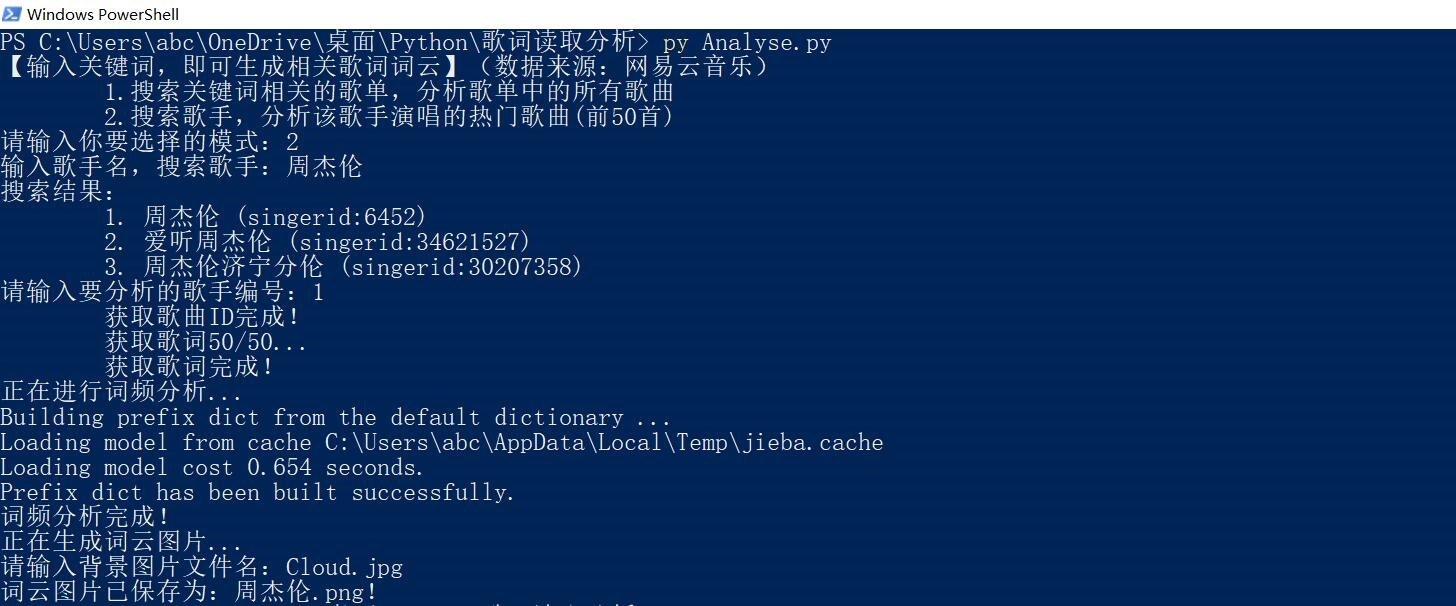

### 以下是该程序做的几张词云图片：
## 关键词：古风
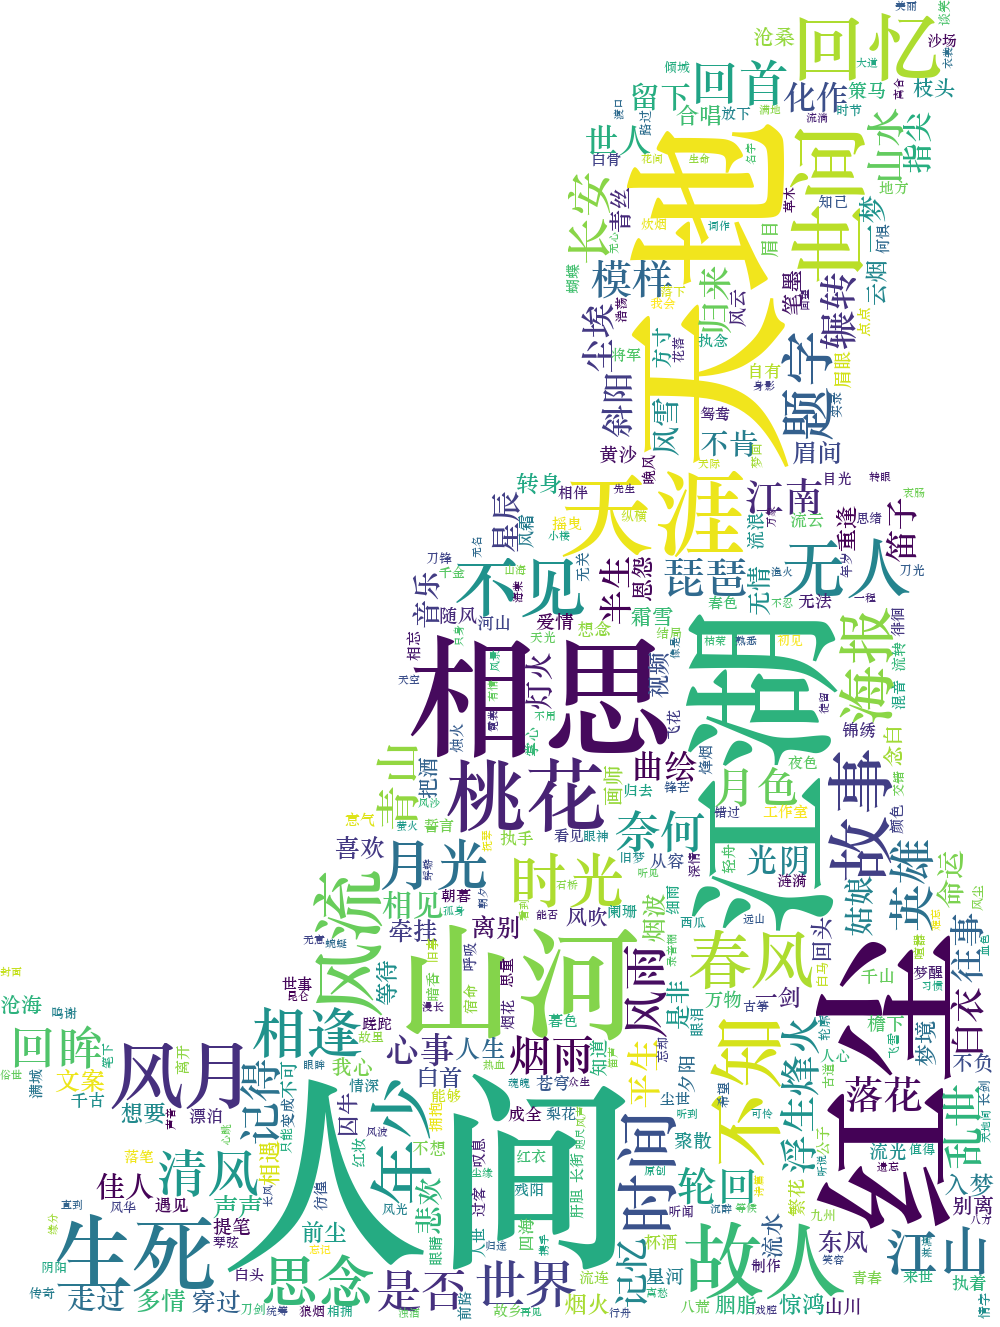
## 关键词：民谣
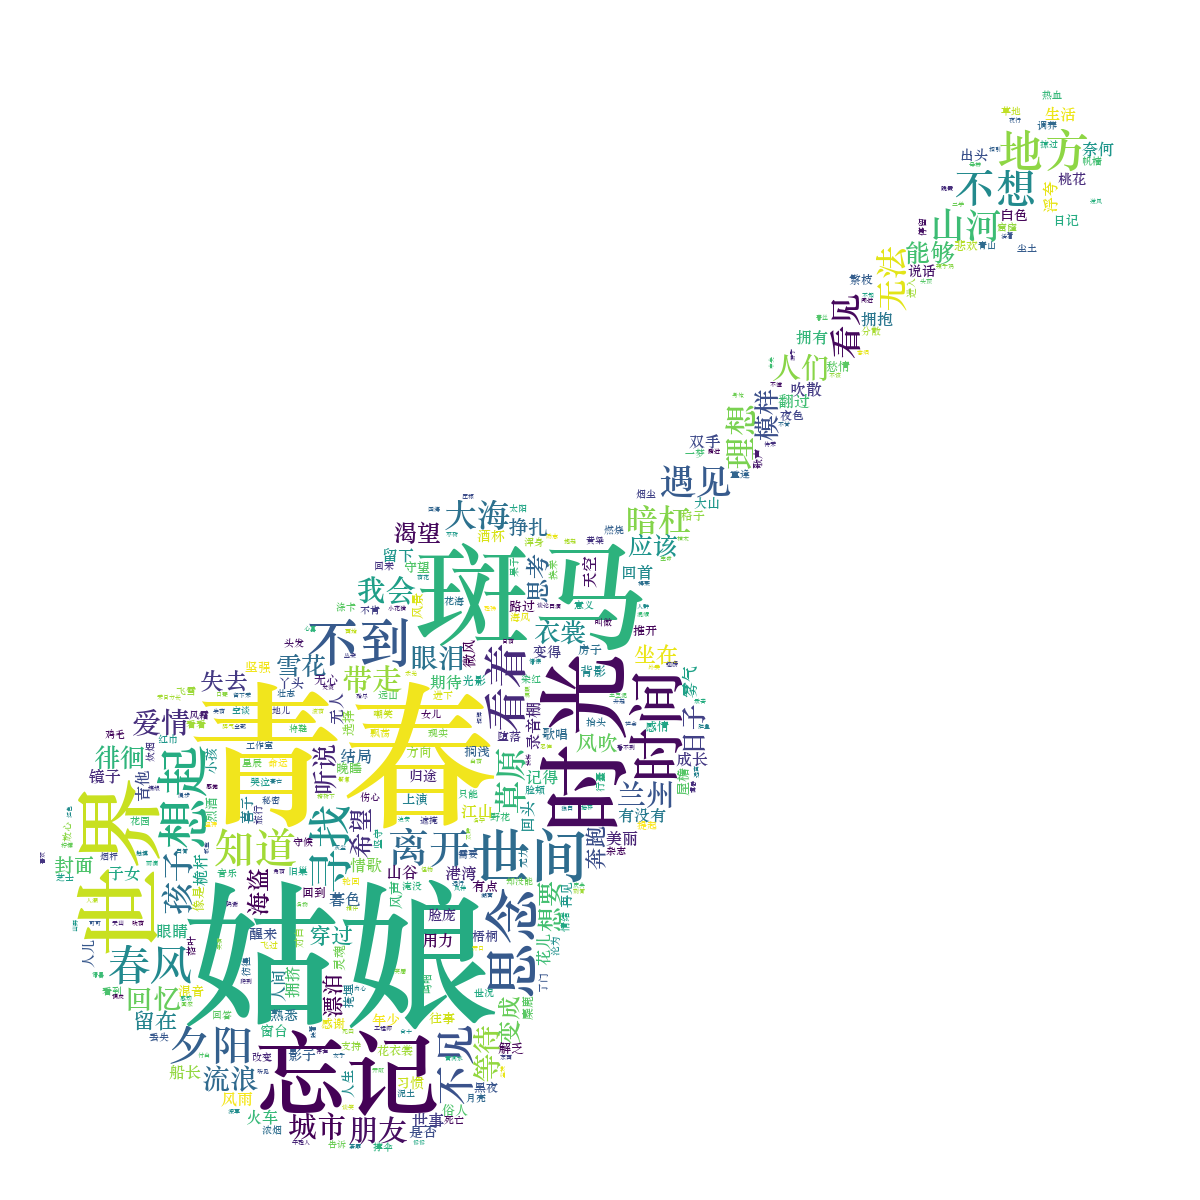
## 关键词：摇滚
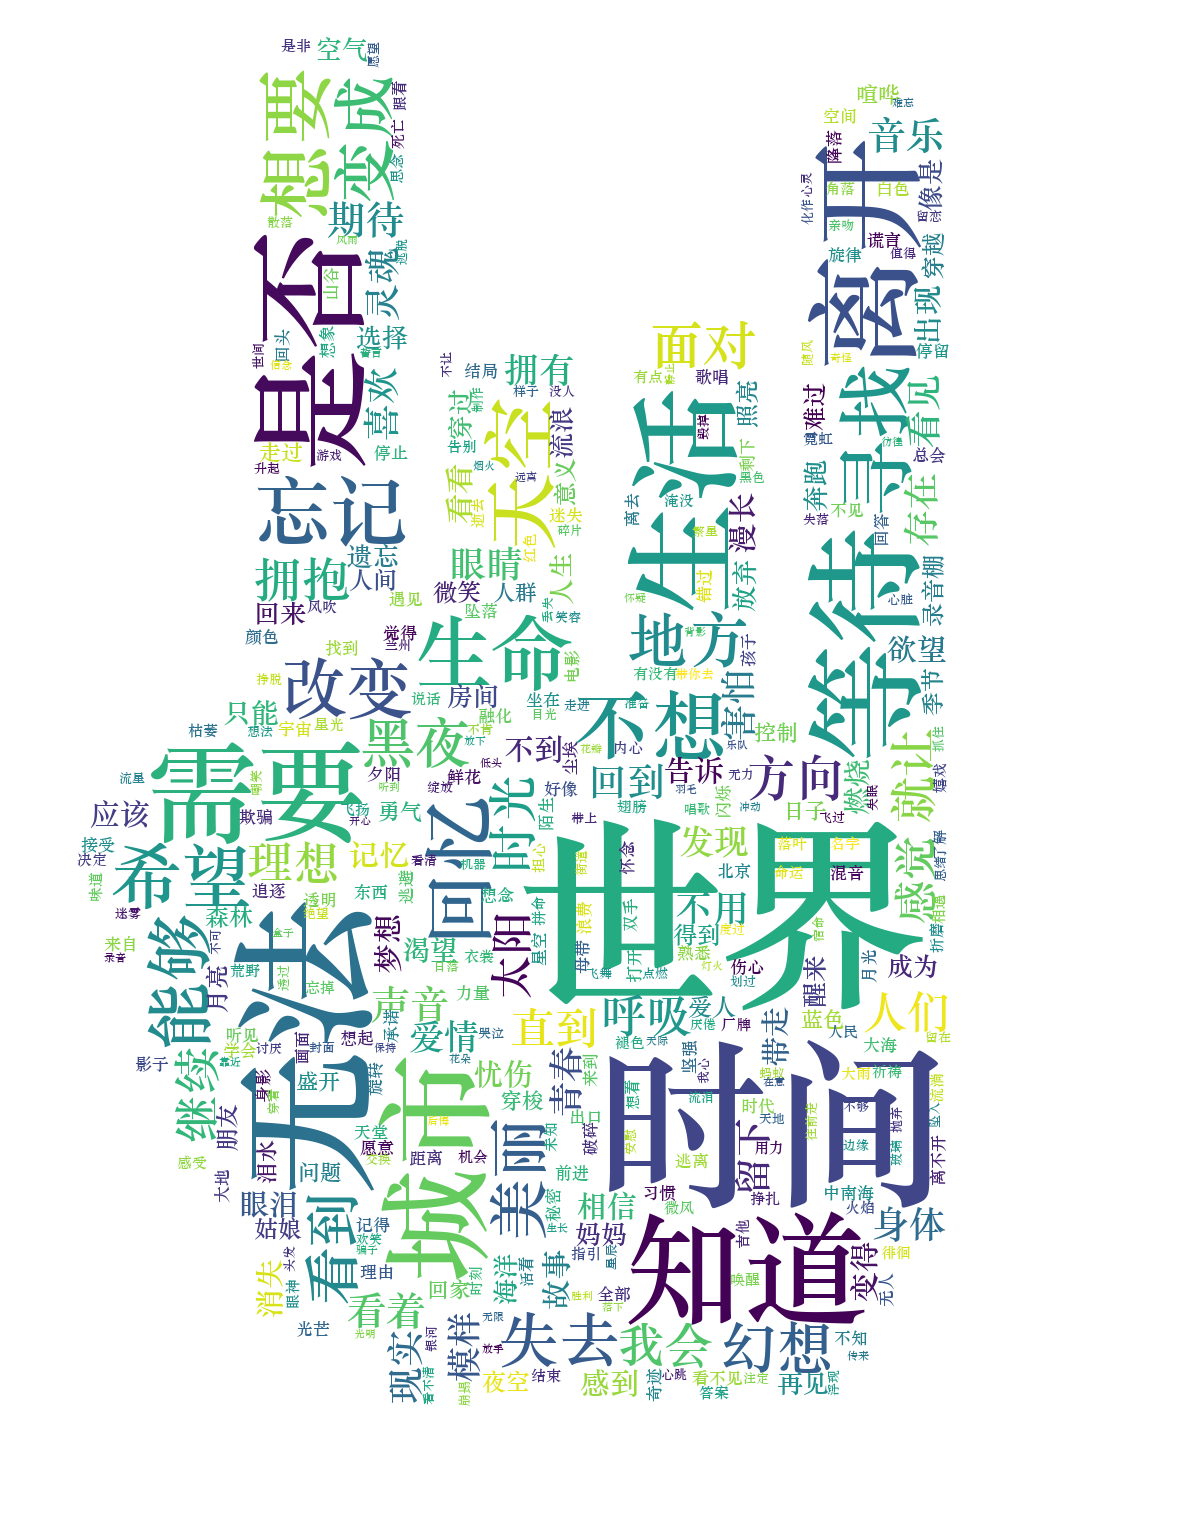
## 关键词：周杰伦
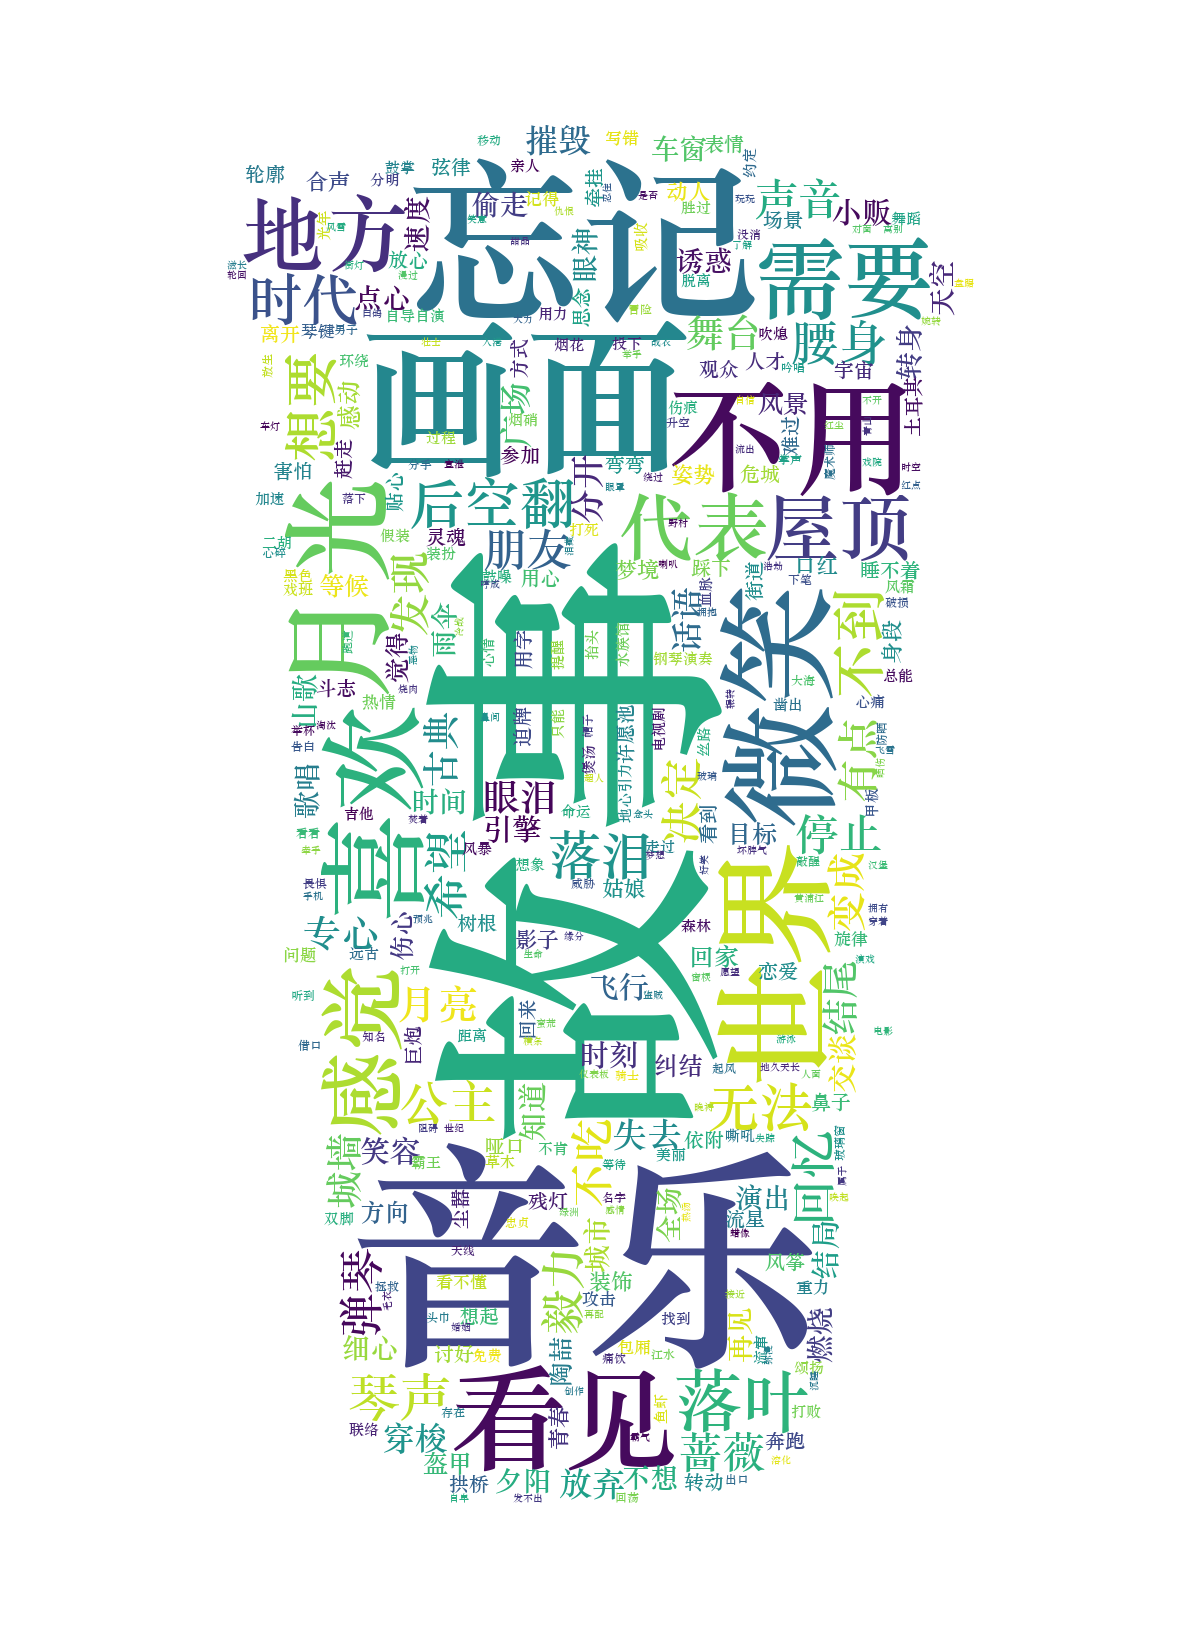
## 上面的都是拼一个图像，同样也可以拼汉字：
## 关键词：治愈
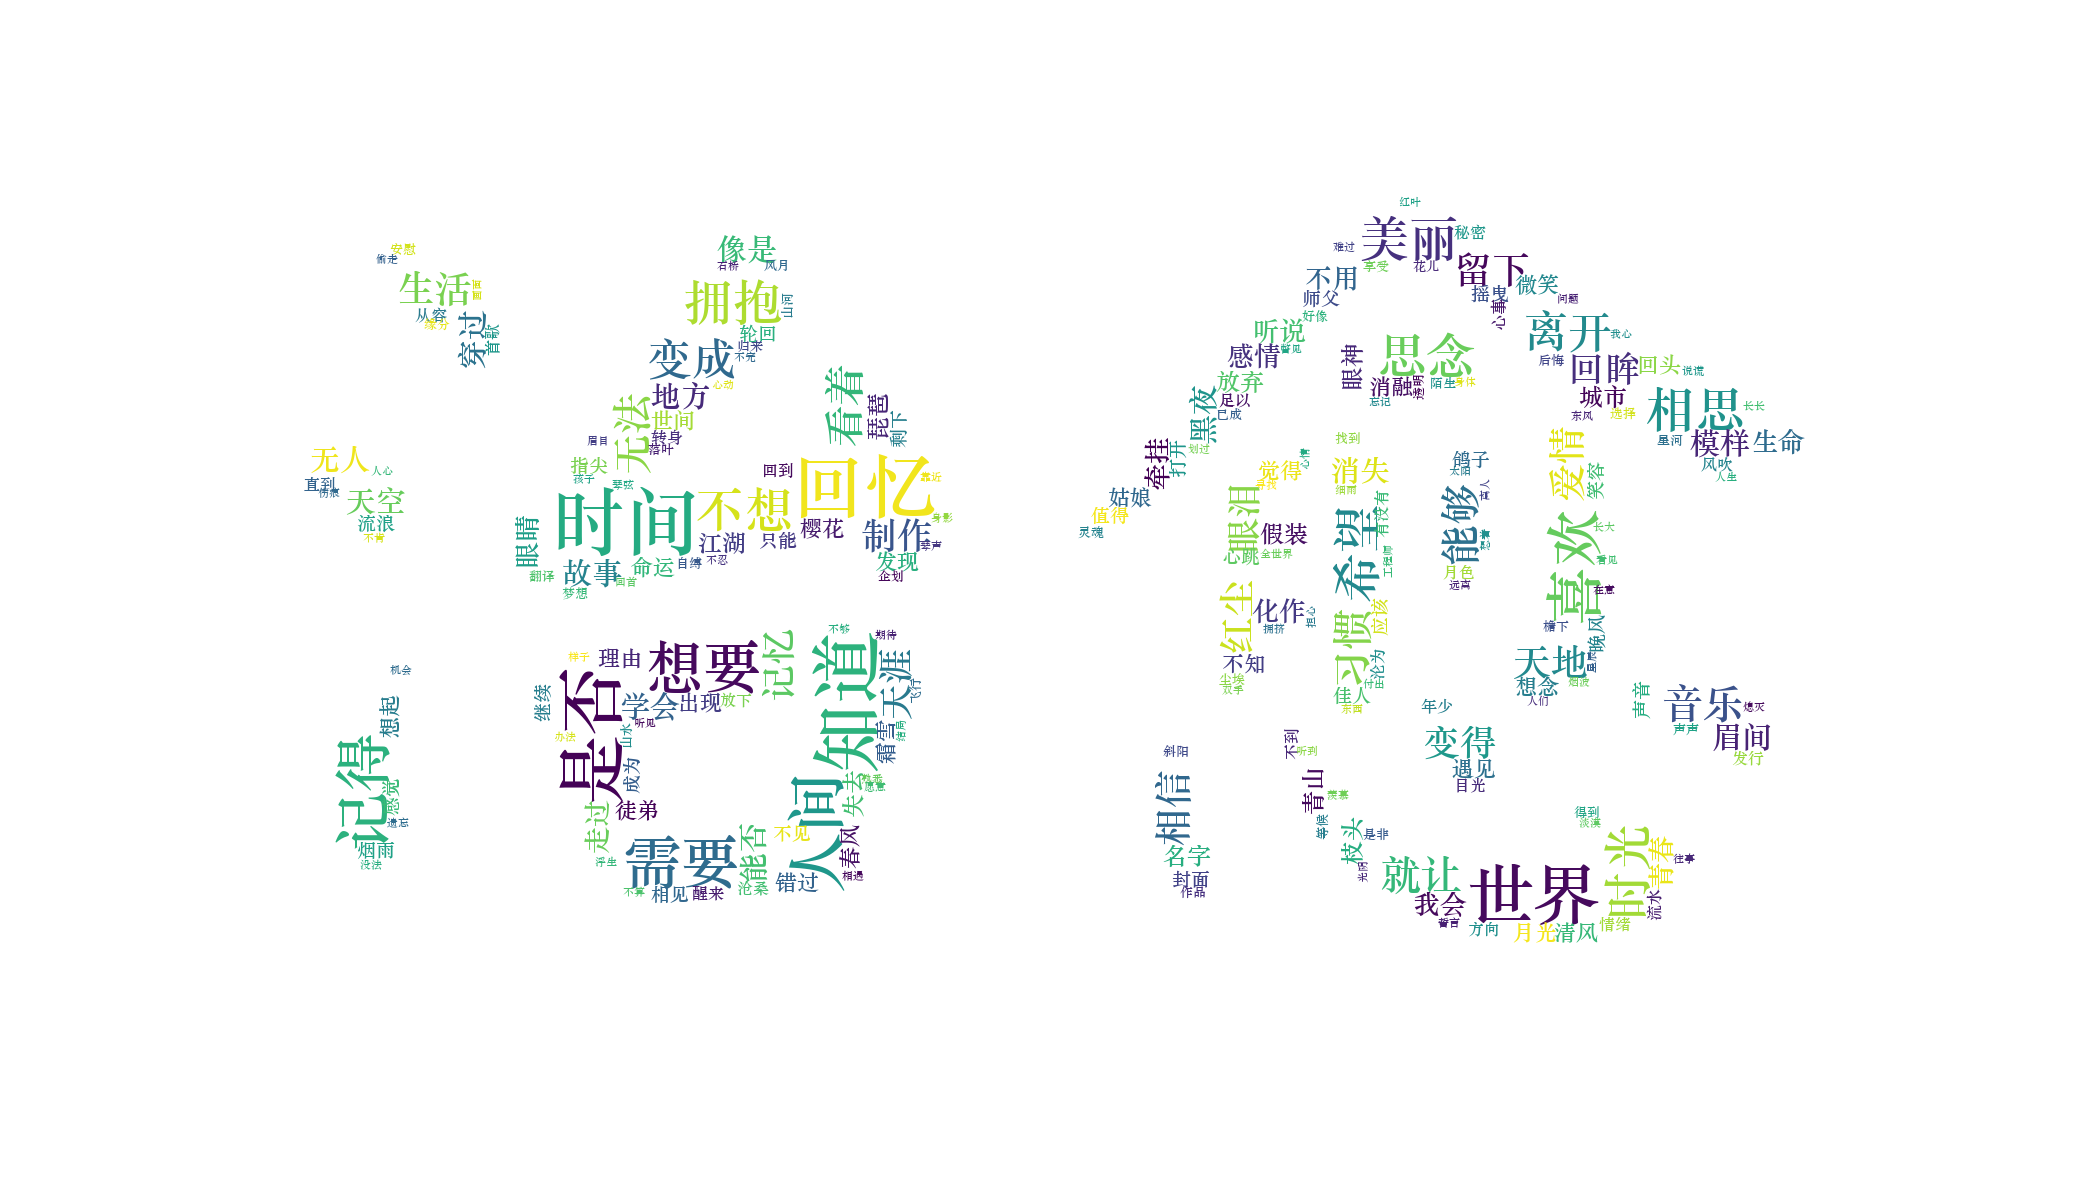